## Assignment 3 - Machine Learning

## Notebook made by  

|**Name** | **Student id** | **email**|
|:- |:-|:-|
|Narendra Parigi|12089265|ccc@xxx.nl|
|Tim Pellenkoft|0440884|ccc@xxx.nl|
|Ralph Nabben|12309001|ralph.nabben@tip.nl|
|Ahron Zijlstra|6087418|ccc@xxx.nl|


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gzip
import requests
from urllib.request import urlopen

In [3]:
# Shows all columns of Pandas with slidebar

pd.options.display.max_columns = None

### 1. Import and prepare data

Import corrected.gz

In [4]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/corrected.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('corrected.gz') as f:
     corrected = pd.read_csv(f, header=None)
corrected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [5]:
corrected.shape

(311029, 42)

Import kddcup.data.gz

In [6]:
#url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"
url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('kddcup.data_10_percent.gz') as f:
     kddcup_data = pd.read_csv(f, header=None)
kddcup_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
kddcup_data.shape

(494021, 42)

Import kddcup.testdata.unlabeled.gz

In [8]:
#url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled.gz"
url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled_10_percent.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('kddcup.testdata.unlabeled_10_percent.gz') as f:
     kddcup_testdata = pd.read_csv(f, header=None)
kddcup_testdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [9]:
kddcup_testdata.shape

(311029, 41)

Set column names for kddcup training data including attack type (see last feature)

In [10]:
kddcup_names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
                'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
                'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
                'num_shells','num_access_files','num_outbound_cmds','is_host_login',
                'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
                'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
                'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                'dst_host_rerror_rate','dst_host_srv_rerror_rate','attack_type']
#kddcup_names

 Set column names for kddcup training data excluding attack type

In [11]:
len_kddcup_names = len(kddcup_names)
kddcup_names_test = kddcup_names[:len_kddcup_names-1]
#kddcup_names_test

In [12]:
training_attack_types = [['back.','DOS',1],['buffer_overflow.','U2R',1],['ftp_write.','R2L',1],
                         ['guess_passwd.','R2L',1],['imap.','R2L',1],['ipsweep.','probing',1],['land.','DOS',1],
                         ['loadmodule.','U2R',1],['multihop.','R2L',1],['neptune.','DOS',1],['nmap.','probing',1],
                         ['normal.','no attack',0],['perl.','U2R',1],['phf.','R2L',1],['pod.','DOS',1],
                         ['portsweep.','probing',1],['rootkit.','U2R',1],['satan.','probing',1],['smurf.','DOS',1],
                         ['spy.','R2L',1],['teardrop.','DOS',1],['warezclient.','R2L',1],['warezmaster.','R2L',1]]
training_attack_types = pd.DataFrame(training_attack_types, columns=['attack_type','attack_type_group','attack'])

In [13]:
#training_attack_types

Include columns names to training data

In [14]:
kddcup_data.columns=kddcup_names
kddcup_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [15]:
#kddcup_data['attack_type'].value_counts()

Merge attack type group to training data

In [16]:
kddcup_data=pd.merge(kddcup_data, training_attack_types, left_on='attack_type', right_on='attack_type')
kddcup_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_type_group,attack
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0


Include columns names to test data

In [17]:
kddcup_testdata.columns=kddcup_names_test
kddcup_testdata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


### 2. Exploratory Data Analysis

___
Check if there are NaNs in training and test set

In [18]:
print('Number of NaN value in training set: ', kddcup_data.isnull().sum().sum())
print('Number of NaN value in test set: ', kddcup_testdata.isnull().sum().sum())

Number of NaN value in training set:  0
Number of NaN value in test set:  0


___
Explore categorical features

In [19]:
cat_features = kddcup_data.describe(include=[np.object]).transpose()
cat_features

,count,unique,top,freq
protocol_type,494021,3,icmp,283602
service,494021,66,ecr_i,281400
flag,494021,11,SF,378440
attack_type,494021,23,smurf.,280790
attack_type_group,494021,5,DOS,391458


In [20]:
df_cat_features = pd.DataFrame(cat_features.index, columns = ['feature'])
df_cat_features = df_cat_features.iloc[:3,:] # only select the features and not the Target

In [21]:
df_cat_features

,feature
0,protocol_type
1,service
2,flag


In [22]:
pd.options.display.max_rows = 100
for i in range(len(df_cat_features)):
    table = pd.crosstab(kddcup_data[df_cat_features.iloc[i,0]], kddcup_data.attack_type_group, margins=True)
    print(table)
    print()
    print('----------------------------------------------------------------------------')

attack_type_group     DOS   R2L  U2R  no attack  probing     All
protocol_type                                                   
icmp               281054     0    0       1288     1260  283602
tcp                109425  1126   49      76813     2652  190065
udp                   979     0    3      19177      195   20354
All                391458  1126   52      97278     4107  494021

----------------------------------------------------------------------------
attack_type_group     DOS   R2L  U2R  no attack  probing     All
service                                                         
IRC                     0     0    0         42        1      43
X11                     0     0    0          9        2      11
Z39_50                 91     0    0          0        1      92
auth                  108     0    0        220        0     328
bgp                   106     0    0          0        0     106
courier               107     0    0          0        1     108
csnet_ns    

In [23]:
pd.options.display.max_rows = 100
for i in range(len(df_cat_features)):
    table = pd.crosstab(kddcup_data[df_cat_features.iloc[i,0]], kddcup_data.attack, margins=True)
    print(table)
    print()
    print('----------------------------------------------------------------------------')

attack             0       1     All
protocol_type                       
icmp            1288  282314  283602
tcp            76813  113252  190065
udp            19177    1177   20354
All            97278  396743  494021

----------------------------------------------------------------------------
attack           0       1     All
service                           
IRC             42       1      43
X11              9       2      11
Z39_50           0      92      92
auth           220     108     328
bgp              0     106     106
courier          0     108     108
csnet_ns         0     126     126
ctf              0      97      97
daytime          0     103     103
discard          0     116     116
domain           3     113     116
domain_u      5862       1    5863
echo             0     112     112
eco_i          389    1253    1642
ecr_i          345  281055  281400
efs              0     103     103
exec             0      99      99
finger         468     202     670


In [49]:
table = pd.crosstab(kddcup_data[df_cat_features.iloc[1,0]], kddcup_data.attack, margins=False)

In [50]:
normed_table = table.div(table.sum(1), axis=0)

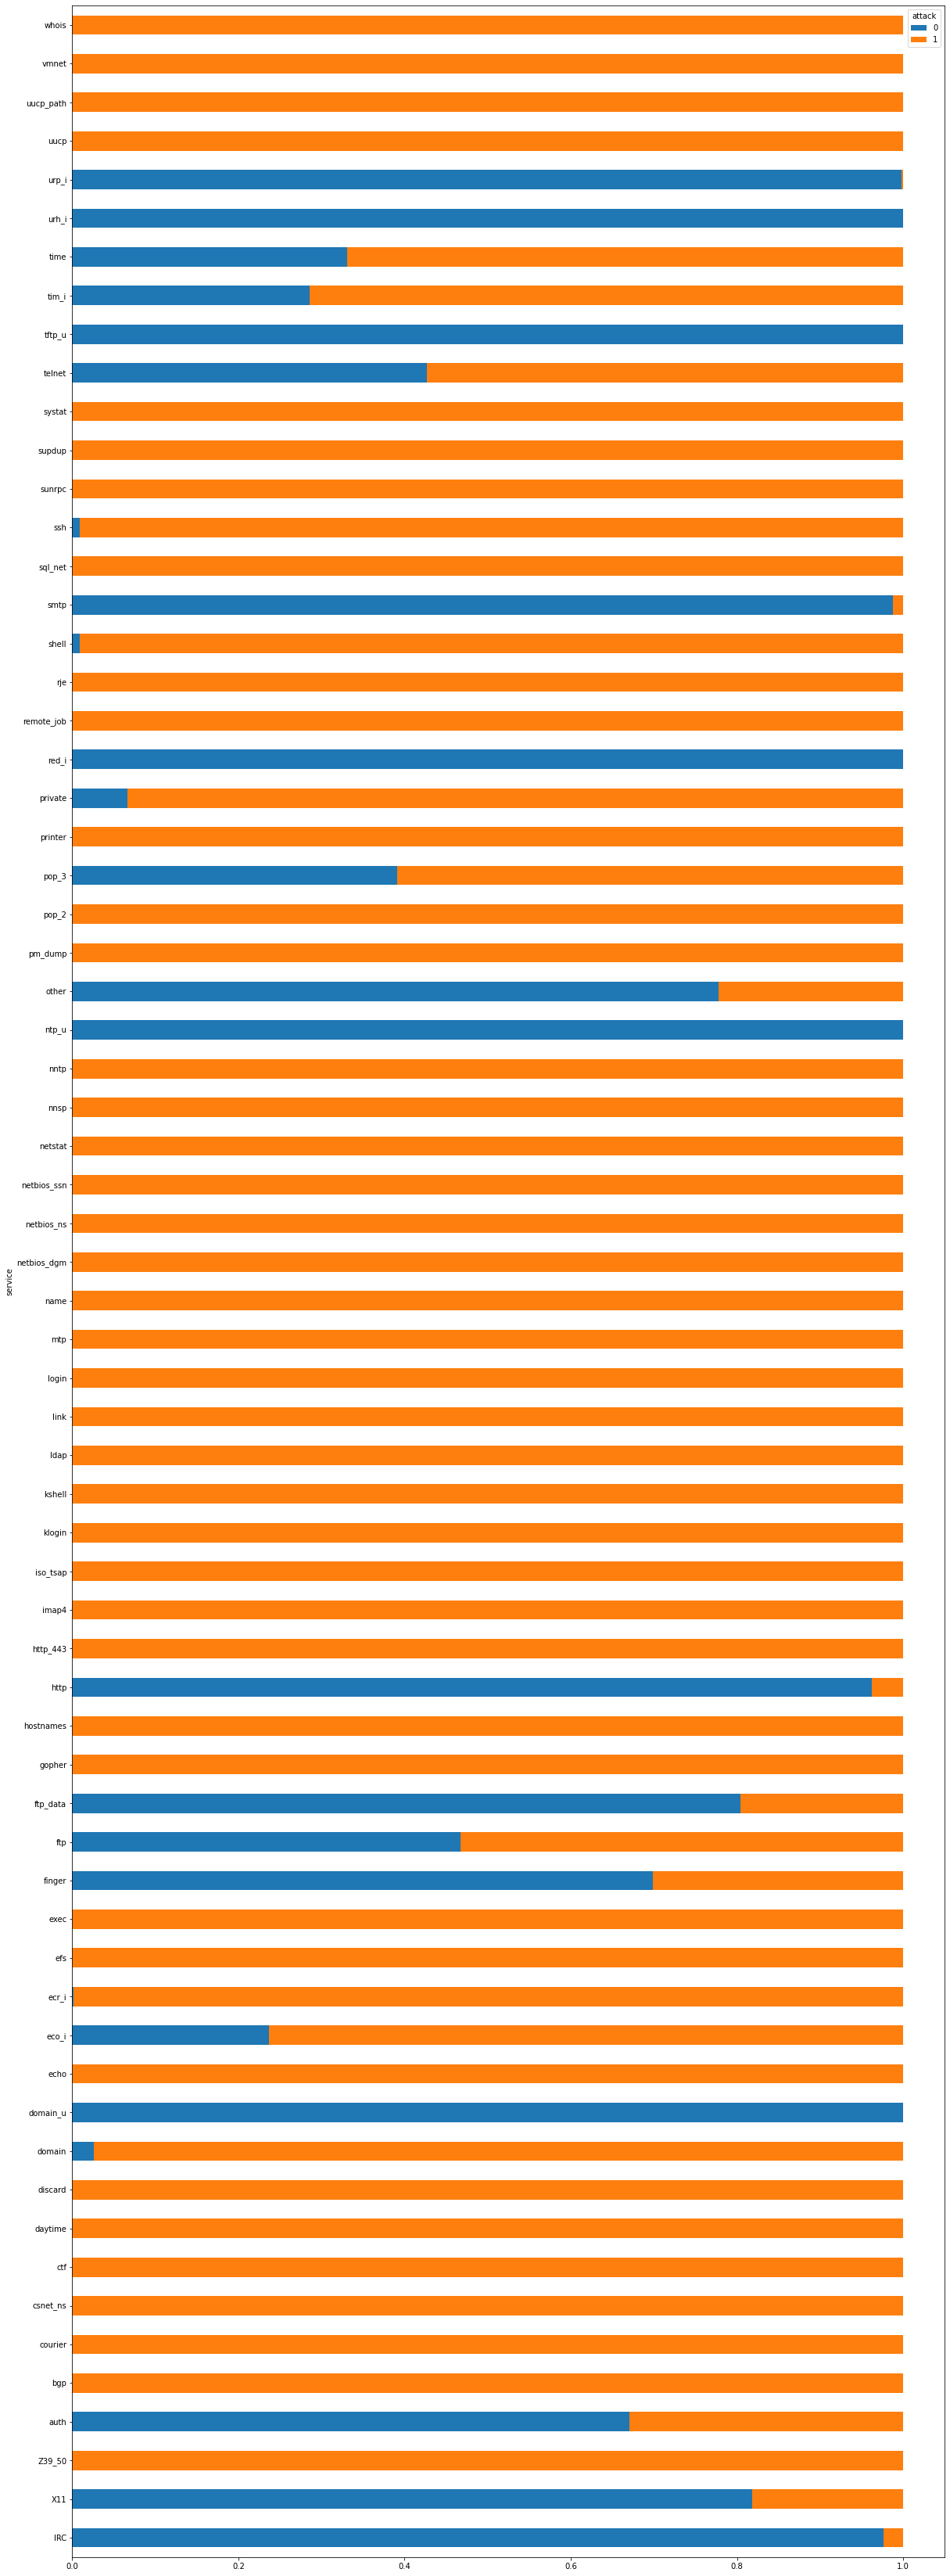

In [51]:
normed_table.plot(kind='barh', figsize=(20,60), stacked=True)
plt.show()

Check of number of values in training and test set for categorical features is the same

In [92]:
pd.options.display.max_rows = 100
for i in range(len(df_cat_features)):
    num_values_train = kddcup_data[df_cat_features.iloc[i,0]].value_counts().count()
    num_values_test = kddcup_testdata[df_cat_features.iloc[i,0]].value_counts().count()
    print(df_cat_features.iloc[i,0])
    print(str(num_values_train) + ' values in train set')
    print(str(num_values_test) + ' values in test set ')
    print()
    

protocol_type
3 values in train set
3 values in test set 

service
66 values in train set
65 values in test set 

flag
11 values in train set
11 values in test set 



Conclusion: Features only relevant for DOS an probing attack. The data is very assymetrical for R2L and U2R

In [93]:
kddcup_data.groupby('attack_type_group')['attack_type_group'].count().sort_values(ascending=False)

attack_type_group
DOS          391458
no attack     97278
probing        4107
R2L            1126
U2R              52
Name: attack_type_group, dtype: int64

In [94]:
kddcup_data.groupby('attack_type')['attack_type'].count().sort_values(ascending=False)

attack_type
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: attack_type, dtype: int64

Conclusion: The data is very assymetric

___
Explore numerical features

In [95]:
kddcup_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101050,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


_Conclusion:_ The feature 'num_outbound_cmds' has only 0 values and can be dropped

In [96]:
kddcup_data.drop(columns=['num_outbound_cmds'], inplace=True)
kddcup_testdata.drop(columns=['num_outbound_cmds'], inplace=True)

### 3. Process en Feature engineer data

Split X (feature) and y (target) from the training and test set

In [97]:
kddcup_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_type_group,attack
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,no attack,0


In [98]:
X_train = kddcup_data.drop(columns=['attack_type','attack_type_group','attack']) # exclude target
#X_train.head()

In [99]:
X_test = kddcup_testdata
#X_test.head()

In [100]:
y_train = kddcup_data[['attack_type','attack_type_group','attack']] # only include target
#y_train.head()

___
Create training and test data with dummies for Categorical features to apply in SVC and LogRegression Models

In [101]:
X_train_dummies = pd.get_dummies(X_train, columns=np.array(df_cat_features.feature))
X_train_dummies

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,5636,0,0,0,0,0,1,2,0,0,2,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
494017,61,294,3929,0,0,0,0,0,1,0,1,0,4,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [102]:
X_test_dummies = pd.get_dummies(X_test, columns=np.array(df_cat_features.feature))
#X_test_dummies

### Determine correlation between values in services category

In [103]:
X_train_service = X_train['service']

In [104]:
X_train_services_dummies = pd.get_dummies(X_train_service, columns=['service'])

In [105]:
X_train_services_dummies.head()

,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
from sklearn.preprocessing import scale

X_train_services_dummies_columns = X_train_services_dummies.columns
X_train_services_dummies = scale(X_train_services_dummies)
cov = np.cov(X_train_services_dummies, rowvar=False)

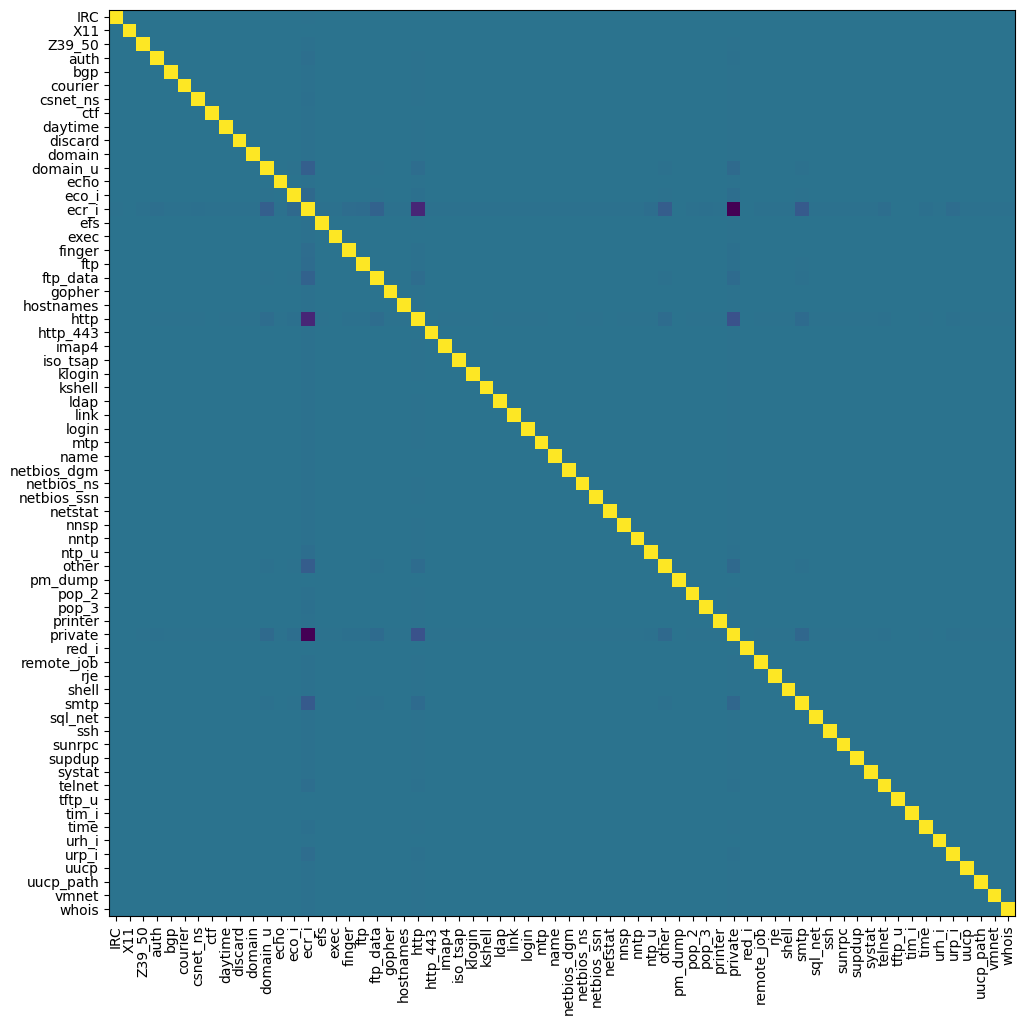

In [107]:
plt.figure(figsize=(12, 12), dpi=100)
plt.imshow(cov)
plt.xticks(range(X_train_services_dummies.shape[1]), X_train_services_dummies_columns, rotation=90)
plt.yticks(range(X_train_services_dummies.shape[1]), X_train_services_dummies_columns);

3 different levels of the target value

In [66]:
y_train1 = y_train['attack_type']
y_train2 = y_train['attack_type_group']
y_train3 = y_train['attack']

In [67]:
from sklearn import preprocessing

In [68]:
le = preprocessing.LabelEncoder()
le.fit(y_train2)
y_train2_bin = le.transform(y_train2)

#### Random Undersampling

In [69]:
from imblearn.under_sampling import RandomUnderSampler

In [70]:
rus = RandomUnderSampler(replacement=False)
X_train_dummies_sub, y_train_sub = rus.fit_sample(X_train, y_train2_bin)
print(X_train_dummies.shape)
print(X_train_dummies_sub.shape)
print(np.bincount(y_train_sub))

(494021, 117)
(260, 40)
[52 52 52 52 52]
